In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
X = pd.read_csv("train.csv")
y = pd.read_csv("test.csv")

In [4]:
df = pd.concat([X.assign(ind="train"),y.assign(ind="test")])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [5]:
df.shape

(2919, 82)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df.MSZoning = le.fit_transform(df.MSZoning)
df.Street = le.fit_transform(df.Street)
df.LotShape = le.fit_transform(df.LotShape)
df.LandContour= le.fit_transform(df.LandContour)
df.Utilities =le.fit_transform(df.Utilities)
df.LotConfig = le.fit_transform(df.LotConfig)
df.LandSlope = le.fit_transform(df.LandSlope)
df.Neighborhood = le.fit_transform(df.Neighborhood)
df.Condition1 = le.fit_transform(df.Condition1)
df.Condition2 = le.fit_transform(df.BldgType)
df.HouseStyle = le.fit_transform(df.HouseStyle)
df.RoofStyle = le.fit_transform(df.RoofStyle)
df.RoofMatl = le.fit_transform(df.RoofMatl)
df.Exterior1st = le.fit_transform(df.Exterior1st)
df.Exterior2nd = le.fit_transform(df.Exterior2nd)
df.MasVnrType = le.fit_transform(df.MasVnrType)
df.ExterQual = le.fit_transform(df.ExterQual)
df.ExterCond = le.fit_transform(df.ExterCond)
df.Foundation = le.fit_transform(df.Foundation)
df.BsmtQual = le.fit_transform(df.BsmtQual)
df.BsmtCond = le.fit_transform(df.BsmtCond)
df.BsmtExposure = le.fit_transform(df.BsmtExposure)
df.BsmtFinType1 = le.fit_transform(df.BsmtFinType1)
df.BsmtFinType2= le.fit_transform(df.BsmtFinType2)
df.Heating = le.fit_transform(df.Heating)
df.HeatingQC = le.fit_transform(df.HeatingQC)
df.CentralAir = le.fit_transform(df.CentralAir)
df.Electrical = le.fit_transform(df.Electrical)
df.KitchenQual = le.fit_transform(df.KitchenQual)
df.Functional = le.fit_transform(df.Functional)
df.FireplaceQu = le.fit_transform(df.FireplaceQu)
df.GarageType = le.fit_transform(df.GarageType)
df.GarageFinish = le.fit_transform(df.GarageFinish)
df.GarageQual = le.fit_transform(df.GarageQual)
df.GarageCond = le.fit_transform(df.GarageCond)
df.PavedDrive = le.fit_transform(df.PavedDrive)
df.SaleType = le.fit_transform(df.SaleType)
df.SaleCondition = le.fit_transform(df.SaleCondition)
df.BldgType= le.fit_transform(df.BldgType)









In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
ind                 0
Length: 82, dtype: int64

In [10]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)

In [11]:
df.drop(columns = ["PoolQC", "Fence", "MiscFeature"], inplace=True)
df.drop(columns = ["Alley"], inplace=True)


In [12]:
train = df[df["ind"]=="train"]
test = df[df["ind"]=="test"]

train["SalePrice"].dropna
train.drop(columns=["ind"], inplace=True)
train

C:\Users\Sindhiya\AppData\Local\Temp\ipykernel_12932\1722697985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=["ind"], inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000.0
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000.0
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500.0
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125.0


In [54]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,120,0,0,6,2010,8,4,NaN,test
1,1462,20,3,81.0,14267,1,0,3,0,0,...,0,0,0,12500,6,2010,8,4,NaN,test
2,1463,60,3,74.0,13830,1,0,3,0,4,...,0,0,0,0,3,2010,8,4,NaN,test
3,1464,60,3,78.0,9978,1,0,3,0,4,...,0,0,0,0,6,2010,8,4,NaN,test
4,1465,120,3,43.0,5005,1,0,1,0,4,...,0,144,0,0,1,2010,8,4,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,6,2006,8,4,NaN,test
1455,2916,160,4,21.0,1894,1,3,3,0,4,...,0,0,0,0,4,2006,8,0,NaN,test
1456,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,9,2006,8,0,NaN,test
1457,2918,85,3,62.0,10441,1,3,3,0,4,...,0,0,0,700,7,2006,8,4,NaN,test


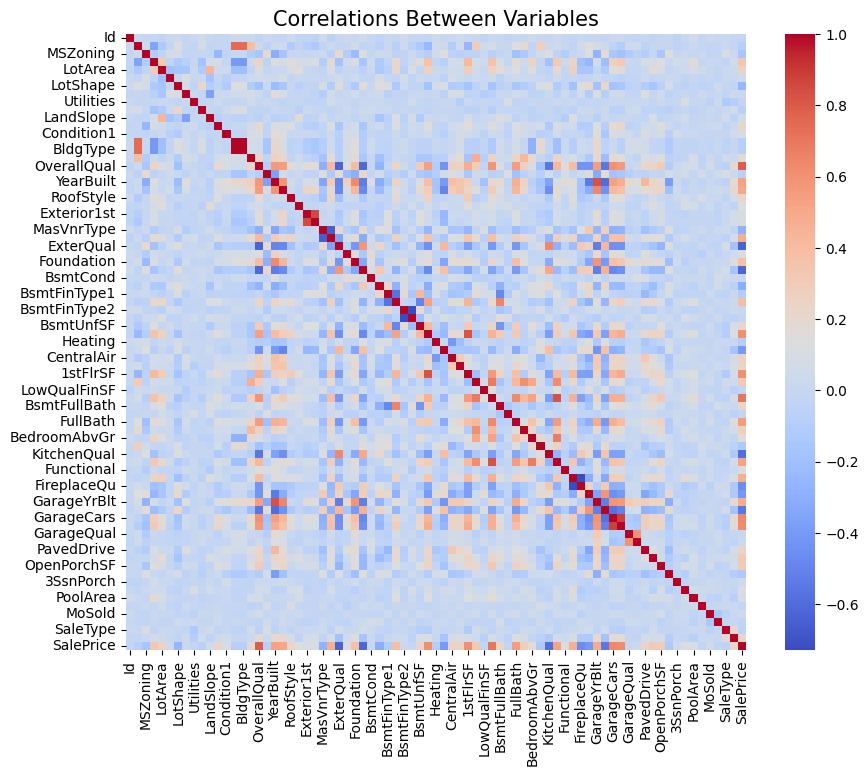

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap="coolwarm")
plt.title("Correlations Between Variables", size=15)
plt.show()


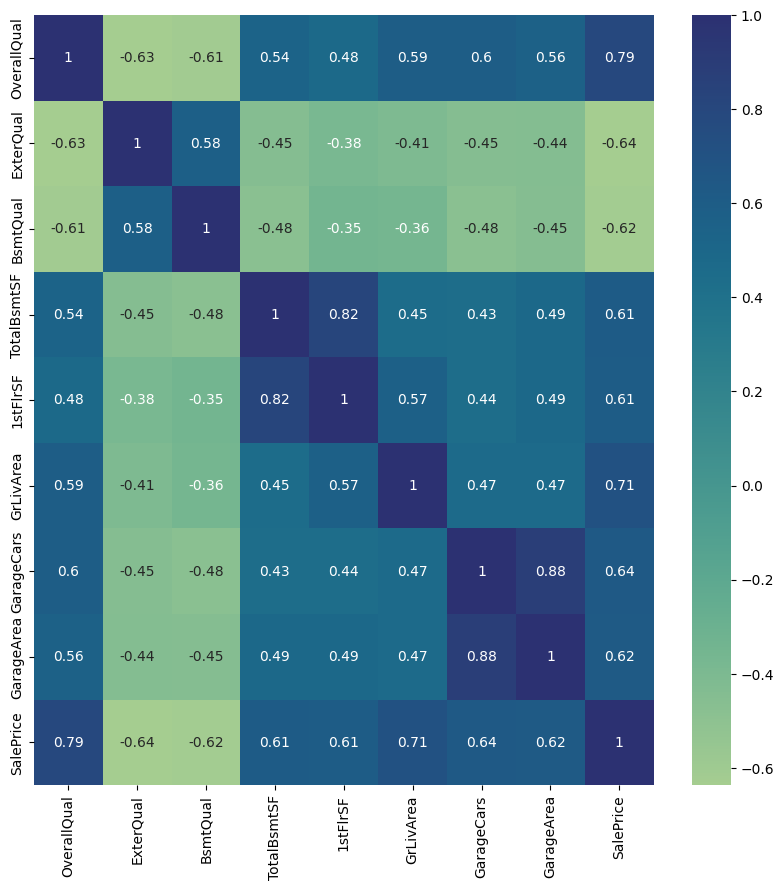

In [131]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.6]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="crest")


In [15]:
# here house price has strong correlation with overall quality, GrLivArea, ExterQual and garage cars

In [73]:
X_train= np.array(train[["OverallQual", "ExterQual", "GrLivArea", "GrLivArea"]])
X_train

array([[   7,    2, 1710, 1710],
       [   6,    3, 1262, 1262],
       [   7,    2, 1786, 1786],
       ...,
       [   7,    0, 2340, 2340],
       [   5,    3, 1078, 1078],
       [   5,    2, 1256, 1256]], dtype=int64)

In [74]:
y_train = np.array(train["SalePrice"])
y_train

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [75]:
X_test = np.array(test[["OverallQual", "ExterQual", "GrLivArea", "GrLivArea"]])
X_test

array([[   5,    3,  896,  896],
       [   6,    3, 1329, 1329],
       [   5,    3, 1629, 1629],
       ...,
       [   5,    3, 1224, 1224],
       [   5,    3,  970,  970],
       [   7,    3, 2000, 2000]], dtype=int64)

In [47]:
from sklearn.metrics import r2_score

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_train = np.array(model.predict(X_train))
result_train = pred_train.astype(int)
result_train

array([227513, 153529, 231609, ..., 309689, 117689, 150713])

In [86]:
pred_test = np.array(model.predict(X_test))
pred_test.astype(int)

array([107833, 157369, 147385, ..., 125369, 111801, 219577])

In [96]:
score =(r2_score)*(y_train,result_train)
score

TypeError: can't multiply sequence by non-int of type 'numpy.float64'